In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

In [24]:
X_train = pd.read_csv("X_train.csv")
X_train.sample(5)

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
2117,4401,Bachelors,2014,Pune,2,33.0,Female,No,0,4401,white
2469,4195,Bachelors,2015,Bangalore,3,29.0,Female,No,5,4195,white
2585,2021,Masters,2015,Pune,3,32.0,Female,No,2,2021,white
1972,3968,Bachelors,2017,Bangalore,3,41.0,Male,No,5,3968,white
3253,4486,Bachelors,2017,Pune,3,28.0,Male,No,5,4486,white


In [25]:
y_train = pd.read_csv("y_train.csv")
y_train.sample(5)

,Unnamed: 0,LeaveOrNot
600,864,0
3231,3930,0
2816,3890,0
3246,2633,1
1597,3850,1


In [26]:
X_train.shape

(3722, 11)

In [27]:
y_train.shape

(3722, 2)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3722 non-null   int64  
 1   Education                  3722 non-null   object 
 2   JoiningYear                3722 non-null   int64  
 3   City                       3722 non-null   object 
 4   PaymentTier                3722 non-null   int64  
 5   Age                        3720 non-null   float64
 6   Gender                     3720 non-null   object 
 7   EverBenched                3722 non-null   object 
 8   ExperienceInCurrentDomain  3722 non-null   int64  
 9   id                         3722 non-null   int64  
 10  Race                       3722 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 320.0+ KB


In [29]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  3722 non-null   int64
 1   LeaveOrNot  3722 non-null   int64
dtypes: int64(2)
memory usage: 58.3 KB


In [30]:
X_train[X_train.isna().any(axis=1)]

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
2800,0,Bachelors,2017,Bangalore,3,NaN,NaN,No,0,0,white
2969,1,Bachelors,2013,Pune,1,NaN,NaN,No,3,1,white


In [31]:
X_train.describe()

,Unnamed: 0,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,id
count,3722.000000,3722.000000,3722.000000,3720.000000,3722.000000,3722.000000
mean,2347.907039,2015.075497,2.696400,30.928763,2.897904,2347.907039
std,1336.606928,1.864950,0.558565,4.860963,1.562391,1336.606928
min,0.000000,2012.000000,1.000000,23.000000,0.000000,0.000000
25%,1206.250000,2014.000000,2.000000,27.000000,2.000000,1206.250000
50%,2366.500000,2015.000000,3.000000,29.000000,3.000000,2366.500000
75%,3496.500000,2017.000000,3.000000,34.000000,4.000000,3496.500000
max,4651.000000,2018.000000,3.000000,43.000000,7.000000,4651.000000


In [32]:
merged_df = pd.merge(X_train, y_train, on='Unnamed: 0')
merged_df.drop(columns=['Unnamed: 0'], inplace=True)
merged_df.set_index("id", inplace=True)
merged_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race,LeaveOrNot
id,,,,,,,,,,
1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,white,0
2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,white,0
4610,Bachelors,2015,Pune,3,26.0,Female,No,2,white,1
2228,Bachelors,2012,Bangalore,3,29.0,Male,No,1,black,0
5,Bachelors,2016,Bangalore,3,24.0,Male,No,0,white,0
...,...,...,...,...,...,...,...,...,...,...
3335,Bachelors,2016,Bangalore,3,38.0,Female,No,0,white,0
1099,Masters,2017,Pune,2,29.0,Male,No,5,white,1
2514,Bachelors,2016,Pune,3,31.0,Male,No,5,black,0


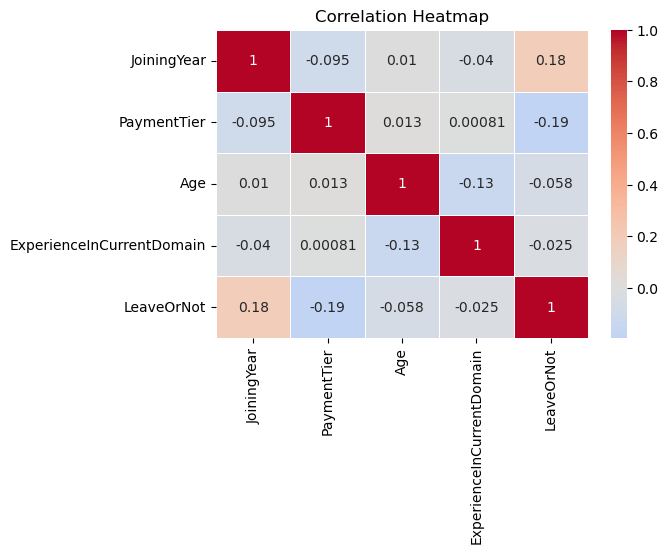

In [33]:
# Assuming you want to include only numeric columns in the correlation matrix
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


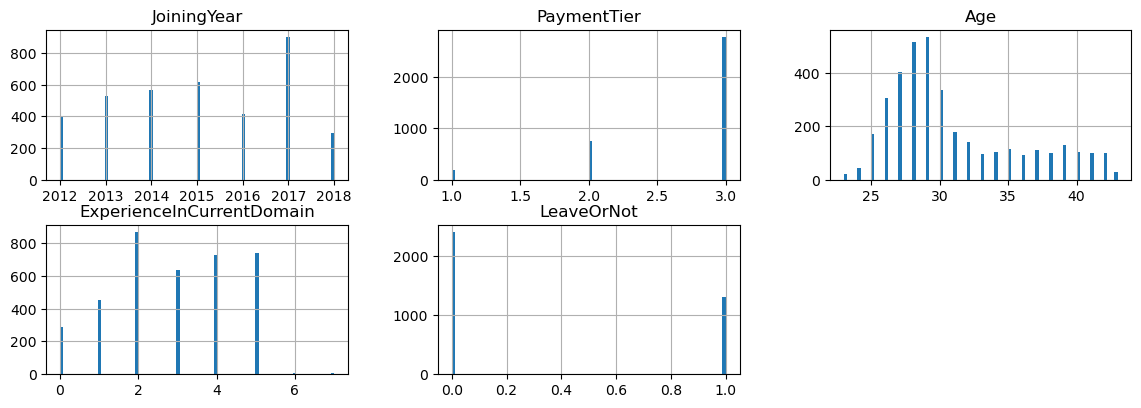

In [34]:
hists = merged_df.hist(bins=80, layout=(3, 3), figsize=(14,7))

C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\s

<Figure size 640x480 with 0 Axes>

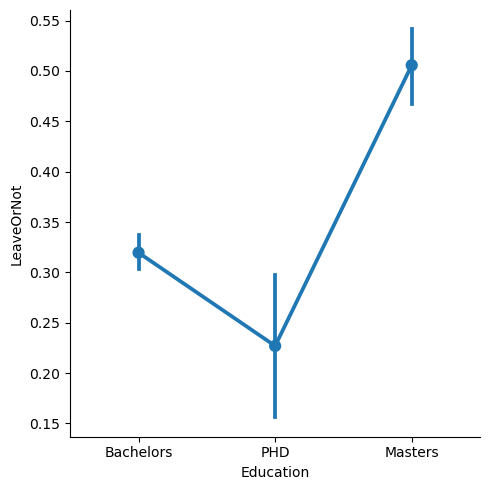

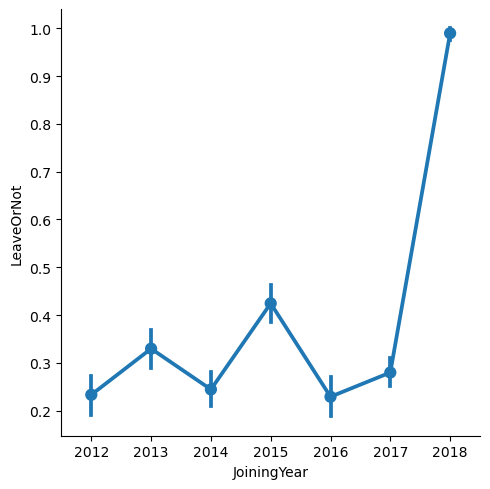

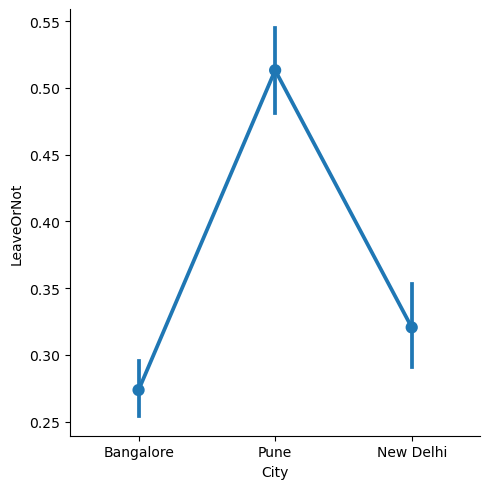

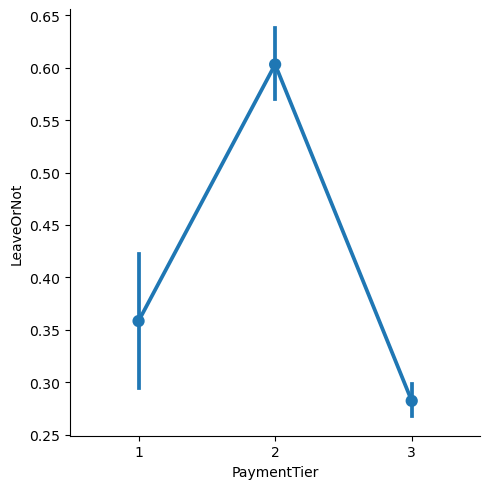

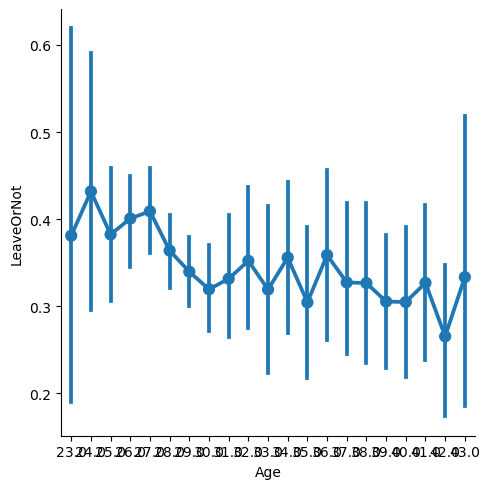

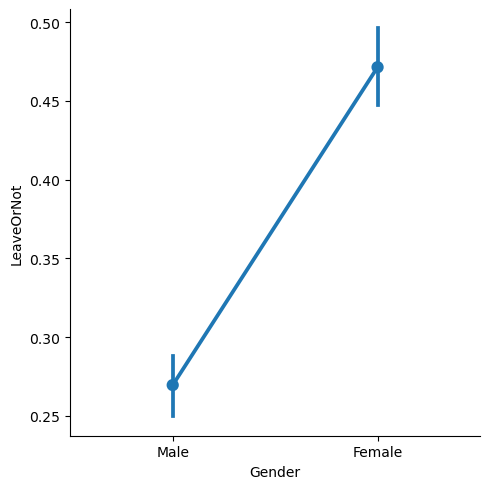

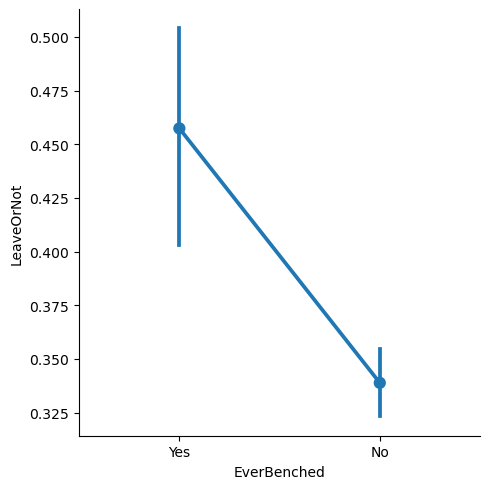

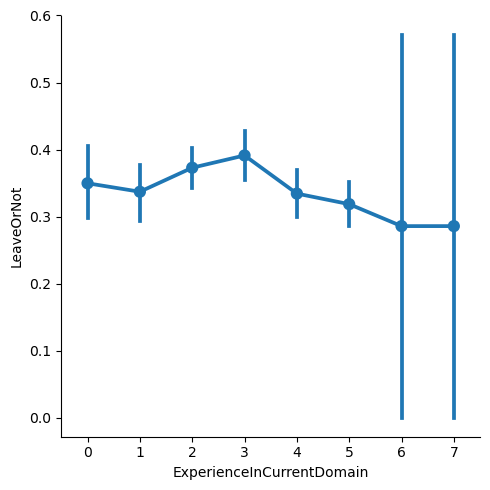

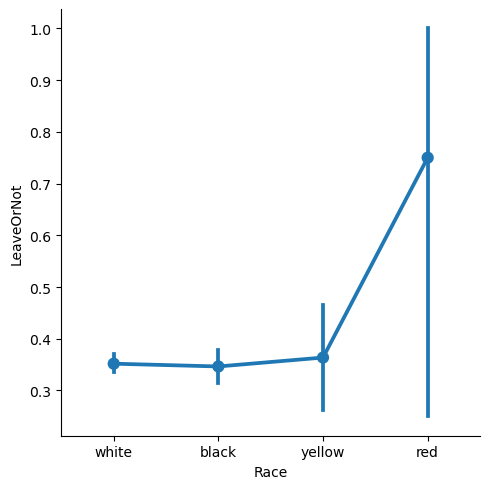

In [35]:
for i, col in enumerate(['Education', 'JoiningYear','City','PaymentTier', 'Age', 'Gender', 'EverBenched','ExperienceInCurrentDomain','Race']):
    plt.figure(i)
    sns.catplot(x=col, y='LeaveOrNot', data=merged_df, kind='point', aspect=1) #col_wrap=3
    
plt.show()